# Movie Recommender System - Item-Based Collaborative Filter

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Import Dataset (Movie Lens)

In [2]:
# Read Movie Titles
movie_titles_df = pd.read_csv('./data/Movie_Id_Titles')
#movie_titles_df.drop(['index'],axis=1, inplace=True)
# Read Movie Ratings
movie_ratings_df = pd.read_csv('./data/u.data', sep='\t', names=['user_id','item_id','rating','timestamp'])
# Drop Timestamp from df
movie_ratings_df.drop(['timestamp'],axis=1, inplace=True)

# Merge both datasets into a single one on the 'item_id '
movies_df = pd.merge(movie_ratings_df, movie_titles_df, on='item_id')
del movie_titles_df
del movie_ratings_df


In [3]:
# Show Movie Head
movies_df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


## Visualize Dataset

In [4]:
# Get data by Movie title (Grouped)
movies_df.groupby('title')['rating'].describe()['count']

title
'Til There Was You (1997)                  9.0
1-900 (1994)                               5.0
101 Dalmatians (1996)                    109.0
12 Angry Men (1957)                      125.0
187 (1997)                                41.0
                                         ...  
Young Guns II (1990)                      44.0
Young Poisoner's Handbook, The (1995)     41.0
Zeus and Roxanne (1997)                    6.0
unknown                                    9.0
Á köldum klaka (Cold Fever) (1994)         1.0
Name: count, Length: 1664, dtype: float64

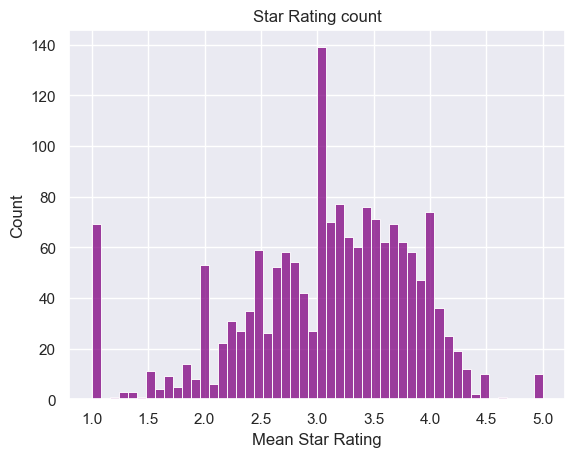

In [5]:
# Plot mean Movie Score Count
movies_mean_rating = pd.concat([
    movies_df.groupby('title')['rating'].describe()['count'],
    movies_df.groupby('title')['rating'].describe()['mean']
],axis=1)

# Reset Index
movies_mean_rating.sort_index(ascending=True)
movies_mean_rating.reset_index(inplace=True)

# Plot Start Rating Count
g = sns.histplot(data=movies_mean_rating, x='mean', bins=50, color='purple')
g.set_title('Star Rating count')
g.set_xlabel('Mean Star Rating')

movies_mean_rating.set_index(['title'],inplace=True)

Text(0.5, 0, 'Number of Ratings')

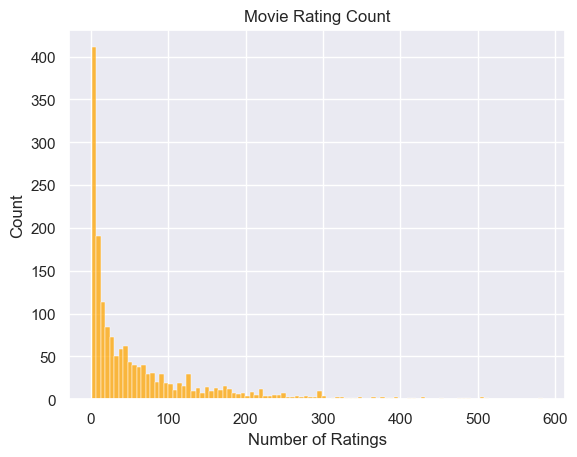

In [6]:
# Plot Movie Rating Count (how many times a movie was rater once, or twice, 30 times, etc.)
g = sns.histplot(data=movies_mean_rating, x='count', bins=100, color='orange')
g.set_title('Movie Rating Count')
g.set_xlabel('Number of Ratings')

## Item-Based Collaborative Filter

In [7]:
# Create 2D Matrix with User in Rows, Movies in columns and the Rating they've given
user_id_movie_title_matrix = movies_df.pivot_table(index='user_id', columns='title', values='rating')
# Show 2D
user_id_movie_title_matrix

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Create correlation matrix between a movie and the entire matrix
# Titanic in this case

# Titanic data per user
titanic_per_user = user_id_movie_title_matrix['Titanic (1997)']
# Correlate with all the movies
titanic_corr = pd.DataFrame(user_id_movie_title_matrix.corrwith(titanic_per_user, method='pearson'),columns=['correlation'])

# Join correlation with the count of ratings
titanic_corr = titanic_corr.join(movies_mean_rating['count'])

# Sort Correlation
titanic_corr.sort_values('correlation',ascending=False, inplace=True)
titanic_corr.head()

c:\Users\alvar\mambaforge\envs\SCRAP\lib\site-packages\numpy\lib\function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\alvar\mambaforge\envs\SCRAP\lib\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation,count
title,,
"Newton Boys, The (1998)",1.0,4.0
"Pest, The (1997)",1.0,8.0
"Amazing Panda Adventure, The (1995)",1.0,10.0
"Savage Nights (Nuits fauves, Les) (1992)",1.0,3.0
Hideaway (1995),1.0,9.0


In [9]:
# Correlations with all movies with all (Not only titanic now)
movies_corr = user_id_movie_title_matrix.corr(method='pearson', min_periods=80)
# Display
movies_corr

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Young Poisoner's Handbook, The (1995)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Read My_Ratings (Simulated for 2 movies)
my_ratings = pd.read_csv('./data/My_Ratings.csv')
# Show
my_ratings

,Movie Name,Ratings
0,Liar Liar (1997),5
1,Star Wars (1977),1


In [11]:
# Accumulator to find movies that correlation to 
# Movies I have rated
similar_movies = pd.Series(dtype=object)

for i in range(my_ratings.shape[0]):
    # Get Matching movie from my list
    single_similar_movie = movies_corr[ my_ratings["Movie Name"][i]].dropna()
    # Scale similarities to my selection
    single_similar_movie = single_similar_movie.map(lambda x: x*my_ratings['Ratings'][i])
    # Append Similar Movies
    similar_movies = similar_movies.append(single_similar_movie)


In [12]:
# Order similar movies
similar_movies.sort_values(inplace=True, ascending=False)
print(f'Top 5 Recommended movies \n\n\n{similar_movies.head(5)}')


Top 5 Recommended movies 


Liar Liar (1997)                             5.000000
Con Air (1997)                               2.349141
Pretty Woman (1990)                          2.348951
Michael (1996)                               2.210110
Indiana Jones and the Last Crusade (1989)    2.072136
dtype: float64
